In [1]:
%matplotlib inline
import os
import sys
from matplotlib import *
from pylab import *

In [2]:
def get_underscore_locations(file):
    underscore_locations = [index for index, character in enumerate(file)
                            if character == "_"]
    return underscore_locations

def get_file_contents(file_name):
    file_path = os.path.join(path, file_name)
    with open(file_path, "r") as file:
        file.readline()
        file_contents = file.readlines()
    return file_contents

def get_detuning_and_gamma(file_contents):
    file_lines_decomposed = [[float(number) for number in line.strip().split('\t')]
                             for line in file_contents]
    file_lines_decomposed = [i for i in file_lines_decomposed if abs(i[1]) < 200]
    detuning, gamma = zip(*file_lines_decomposed)
    return detuning, gamma

In [3]:
def plot_detuning_vs_gamma(path):
    for file_name in sorted(os.listdir(path)):
        file_contents = get_file_contents(file_name)
        detuning, gamma = get_detuning_and_gamma(file_contents)
        plt.plot(detuning, gamma, label = file_name[18:])
    return plt

def add_plot_labels(plt):
    plt.legend(loc="upper right")
    plt.xlabel("My x label")
    plt.ylabel("My y label")
    plt.title("My title")
    return plt

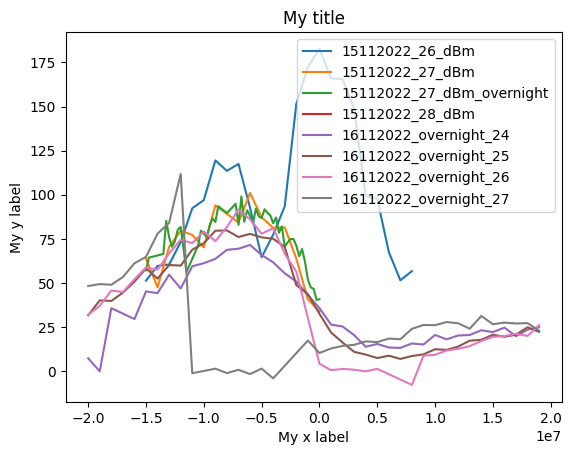

In [4]:
parent_folder = os.path.dirname(sys.path[0])
path = os.path.join(parent_folder, "Gamma Results")
plt = plot_detuning_vs_gamma(path)
plt = add_plot_labels(plt)